In [1]:
from google.colab import drive
drive.mount('/content/drive') # Untuk Menyambungkan kedalam google drive

Mounted at /content/drive


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
data = pd.read_csv('/content/drive/MyDrive/Pembelajaran Mesin/RegresiUTSTelkom.csv',header=None)

# Print the column names to see the available columns
print(data.columns)

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90],
      dtype='int64')


In [19]:

# Display the first few rows of the DataFrame
df.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


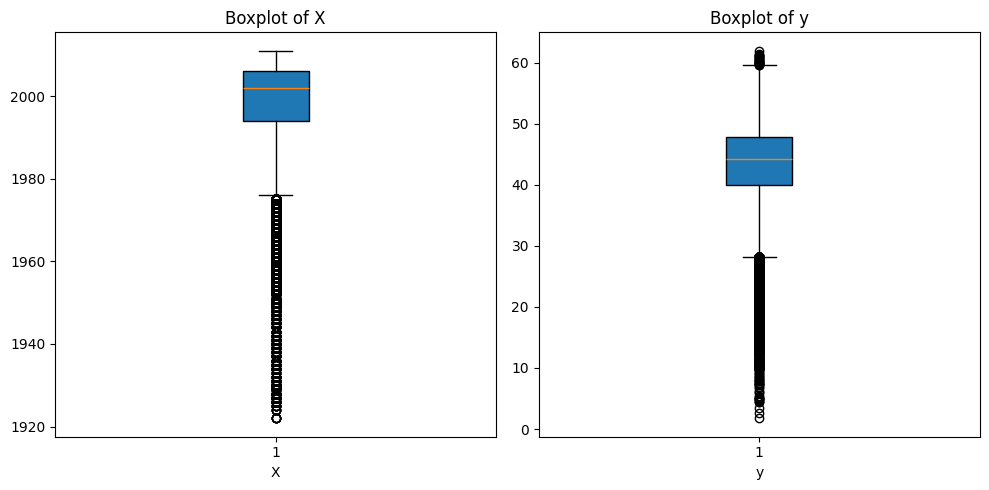

In [29]:
import matplotlib.pyplot as plt

# Visualisasi box plot untuk X dan y
plt.figure(figsize=(10, 5))

# Boxplot untuk X
plt.subplot(1, 2, 1)
plt.boxplot(data.iloc[:, 0], vert=True, patch_artist=True)
plt.title('Boxplot of X')
plt.xlabel('X')

# Boxplot untuk y
plt.subplot(1, 2, 2)
plt.boxplot(data.iloc[:, 1], vert=True, patch_artist=True)
plt.title('Boxplot of y')
plt.xlabel('y')

# Tampilkan plot
plt.tight_layout()
plt.show()


Visualisasi ini dapat disimpulkan bahwa variabel X memiliki variasi yang lebih besar dan distribusi yang sedikit miring ke bawah dengan beberapa outliers. Variabel Y, di sisi lain, menunjukkan distribusi yang lebih simetris tetapi dengan lebih banyak outliers yang tersebar baik di atas maupun di bawah median. Analisis ini memberikan gambaran awal mengenai karakteristik distribusi data pada kedua variabel

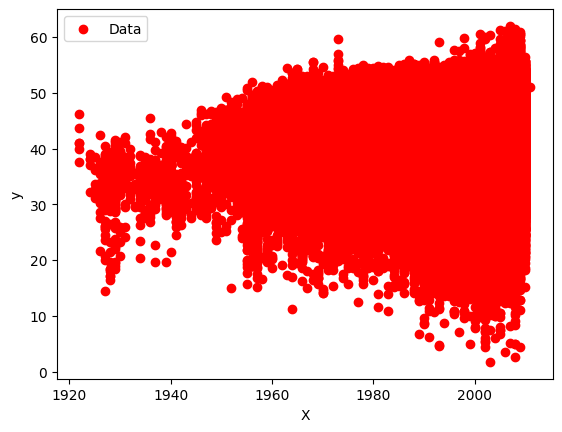

In [23]:
# Menggunakan kolom pertama sebagai X dan kolom kedua sebagai y
X = data.iloc[:, 0].values.reshape(-1, 1)  # Kolom pertama sebagai X
y = data.iloc[:, 1].values.reshape(-1, 1)  # Kolom kedua sebagai y

# Plot data
plt.scatter(X, y, color='red', label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

 Scatter plot ini memperlihatkan hubungan yang lemah antara X dan Y dengan adanya tren peningkatan nilai Y secara umum terhadap nilai X. Namun, data juga menunjukkan variabilitas yang tinggi dan beberapa outliers yang menyimpang dari pola utama. Analisis ini dapat digunakan untuk memahami sebaran dan tren data, serta kemungkinan adanya faktor-faktor lain yang mempengaruhi variabel Y dalam rentang waktu yang berbeda pada variabel X.

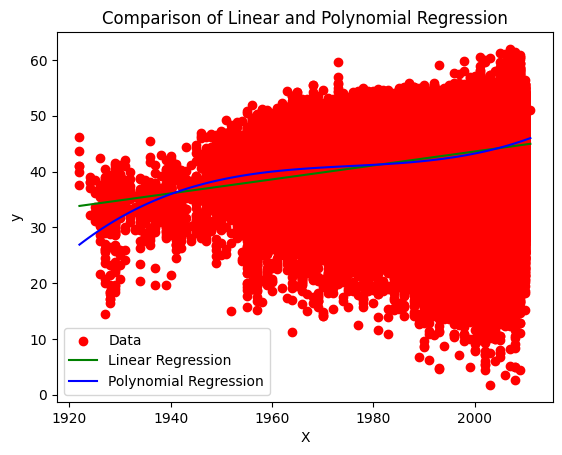

In [24]:
# Pastikan data memiliki kolom yang sesuai untuk X dan y
X = data.iloc[:, 0].values.reshape(-1, 1)  # Kolom pertama sebagai X
y = data.iloc[:, 1].values.reshape(-1, 1)  # Kolom kedua sebagai y

# Membuat model regresi linear
linear_model = LinearRegression()
linear_model.fit(X, y)

# Prediksi dengan model regresi linear
y_pred_linear = linear_model.predict(X)

# Membuat model regresi polinomial
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Membuat data untuk prediksi (untuk visualisasi yang lebih halus)
X_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Sesuaikan range X
X_test_poly = poly.transform(X_test)
y_pred_poly = poly_model.predict(X_test_poly)

# Visualisasi hasil
plt.scatter(X, y, color='red', label='Data')
plt.plot(X_test, linear_model.predict(X_test), color='green', label='Linear Regression')
plt.plot(X_test, y_pred_poly, color='blue', label='Polynomial Regression')
plt.title('Comparison of Linear and Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Hasil regresi ini memberikan wawasan bahwa data Y memiliki pola non-linear terhadap X, dan regresi polinomial lebih baik dalam menggambarkan tren data dibandingkan regresi linear. Namun, kehati-hatian harus diperhatikan untuk menghindari kompleksitas model yang berlebihan (overfitting) jika regresi polinomial yang lebih kompleks digunakan.

In [28]:
# MSE and MAE
mse_linear = mean_squared_error(y, y_pred_linear)
# MSE and MAE
mse_linear = mean_squared_error(y, y_pred_linear)
mse_poly = mean_squared_error(y, poly_model.predict(X_poly))
print(f"Mean Squared Error for Linear Regression: {mse_linear:.2f}")
print(f"Mean Squared Error for Polynomial Regression: {mse_poly:.2f}")


Mean Squared Error for Linear Regression: 34.95
Mean Squared Error for Polynomial Regression: 34.74


Output ini menampilkan nilai Mean Squared Error (MSE) untuk model regresi linear dan regresi polinomial. MSE adalah metrik yang digunakan untuk mengukur rata-rata kesalahan kuadrat antara nilai prediksi dan nilai aktual, dengan rumus:

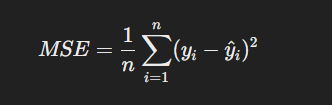

Semakin rendah nilai MSE, semakin baik model dalam memprediksi data.

MSE dari model regresi polinomial (34.74) sedikit lebih rendah daripada MSE dari model regresi linear (34.95). Ini menunjukkan bahwa model polinomial lebih baik dalam menyesuaikan data dan memberikan prediksi yang sedikit lebih akurat dibandingkan dengan model linear.

In [31]:
# Import the necessary function
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Import the necessary function
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor

# Model 1: Decision Tree Regressor
# --------------------------------------------
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [35]:
# Import the necessary function
from sklearn.neighbors import KNeighborsRegressor  # Import KNeighborsRegressor

# Model 2: k-NN Regressor
# --------------------------------------------
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [37]:
# Import the necessary function
!pip install xgboost # Install the xgboost library if not already installed
import xgboost as xgb # Import xgboost library and alias it as 'xgb'

# Model 3: XGBoost Regressor
# --------------------------------------------
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

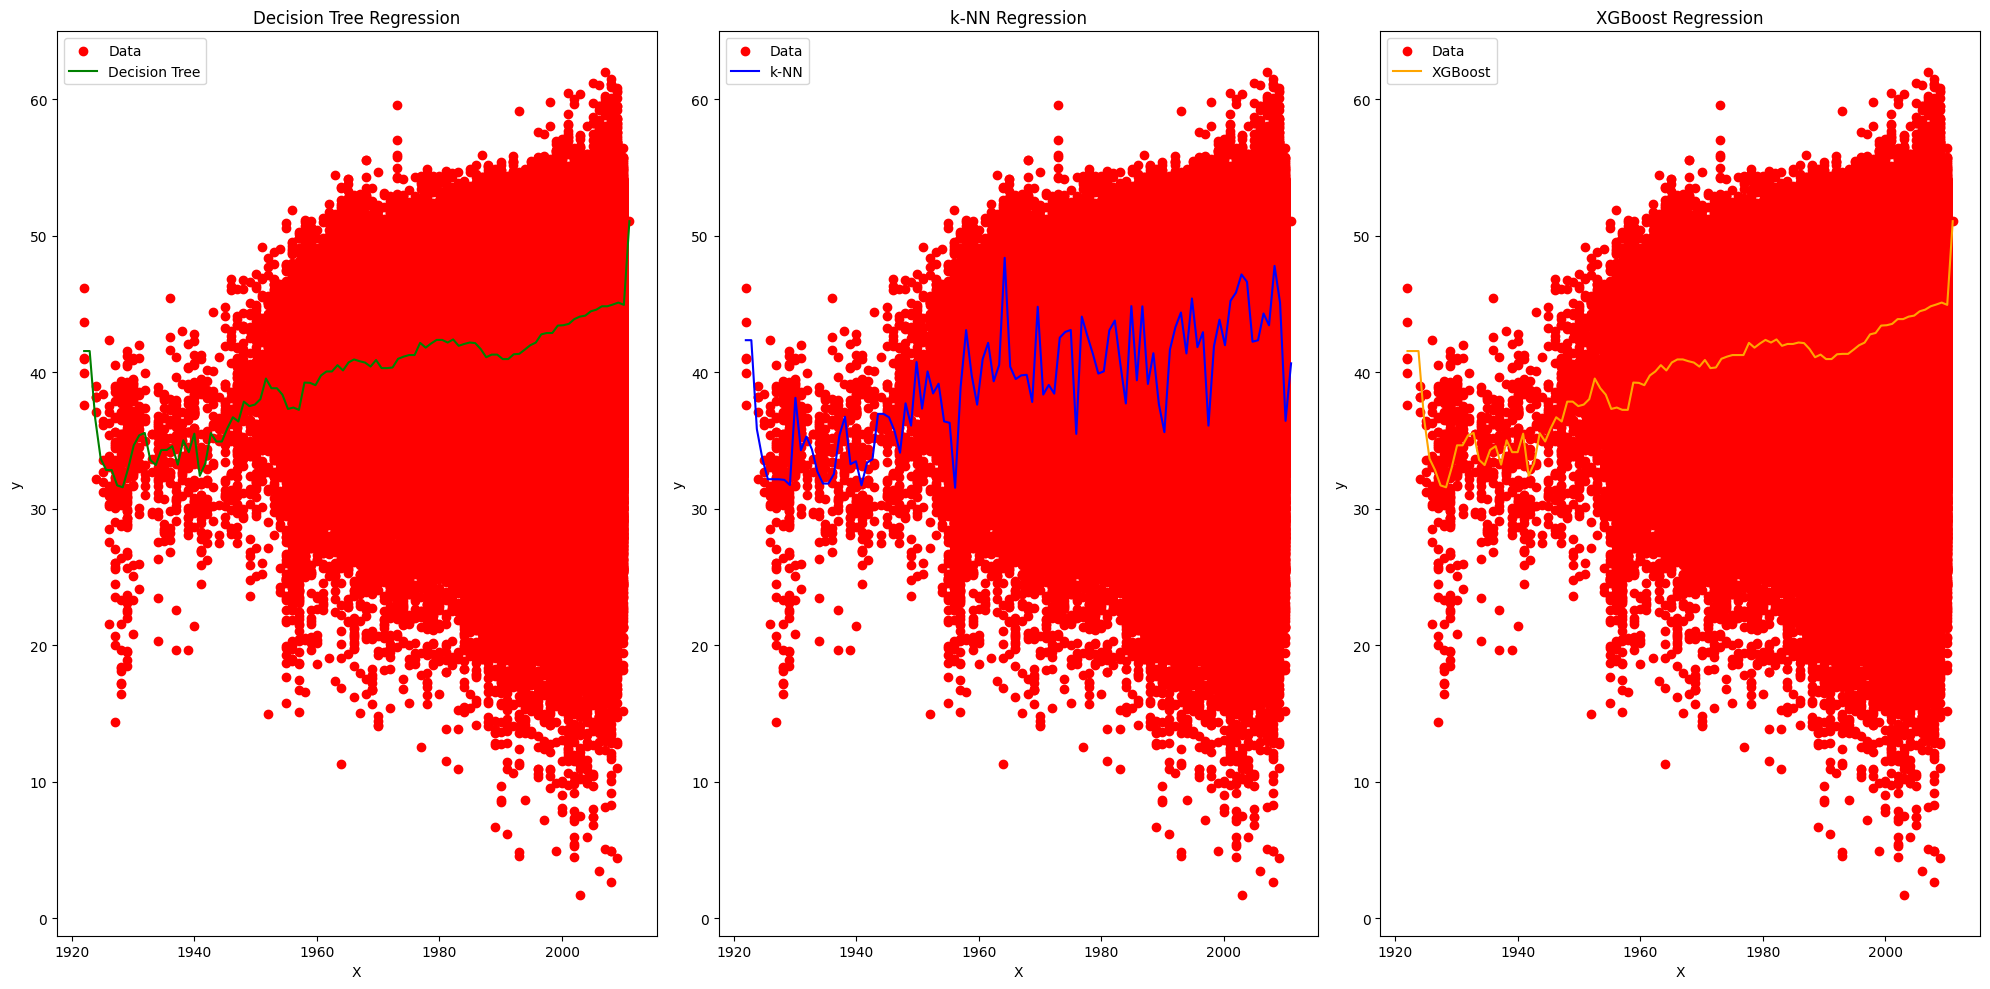

In [44]:
# Visualisasi Model
# --------------------------------------------
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

plt.figure(figsize=(20, 10))

# Decision Tree Visualization
plt.subplot(1, 3, 1)
plt.scatter(X, y, color='red', label='Data')
plt.plot(X_plot, dt_model.predict(X_plot), color='green', label='Decision Tree')
plt.title('Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# k-NN Visualization
plt.subplot(1, 3, 2)
plt.scatter(X, y, color='red', label='Data')
plt.plot(X_plot, knn_model.predict(X_plot), color='blue', label='k-NN')
plt.title('k-NN Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# XGBoost Visualization
plt.subplot(1, 3, 3)
plt.scatter(X, y, color='red', label='Data')
plt.plot(X_plot, xgb_model.predict(X_plot), color='orange', label='XGBoost')
plt.title('XGBoost Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()


Output tersebut menampilkan hasil regresi dari tiga model berbeda—Decision Tree Regression, k-Nearest Neighbors (k-NN) Regression, dan XGBoost Regression—yang digunakan untuk memprediksi variabel Y berdasarkan X. Pada grafik pertama, model Decision Tree Regression diwakili oleh garis hijau yang memperlihatkan pola prediksi berbentuk langkah-langkah (step-wise), yang merupakan karakteristik dari model pohon keputusan. Meskipun model ini menangkap tren umum data, prediksi yang dihasilkan tampak kurang mulus dan sering kali tiba-tiba naik atau turun, menunjukkan bahwa model ini kurang akurat dalam menangkap variasi data yang lebih halus. Grafik kedua menunjukkan hasil dari k-NN Regression, yang ditampilkan dengan garis biru. Pola prediksi pada model ini terlihat sangat tidak stabil, dengan fluktuasi tajam terutama sebelum tahun 1960. Hal ini menunjukkan bahwa k-NN terlalu sensitif terhadap variasi data lokal, sehingga hasil prediksinya menjadi sangat bervariasi dan cenderung overfitting, tanpa menangkap pola jangka panjang dengan baik. Pada grafik ketiga, garis kuning menunjukkan hasil dari model XGBoost Regression. Model ini memberikan prediksi yang lebih halus dan konsisten, mengikuti tren data dengan lebih baik tanpa banyak fluktuasi. XGBoost menunjukkan kemampuan yang baik dalam menangkap pola global dan variasi kecil dalam data tanpa overfitting, menjadikannya lebih stabil dan cocok untuk data dengan pola non-linear. Dari ketiga model ini, XGBoost Regression tampaknya memberikan hasil terbaik, karena mampu menangkap tren jangka panjang secara akurat dan menghasilkan prediksi yang stabil, menjadikannya model yang ideal untuk dataset ini.

In [46]:
# Evaluasi MSE untuk Semua Model
# --------------------------------------------
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"Mean Squared Error for Decision Tree: {mse_dt:.2f}")
print(f"Mean Squared Error for k-NN: {mse_knn:.2f}")
print(f"Mean Squared Error for XGBoost: {mse_xgb:.2f}")

Mean Squared Error for Decision Tree: 34.40
Mean Squared Error for k-NN: 41.07
Mean Squared Error for XGBoost: 34.40


Dari hasil ini, kita dapat menyimpulkan bahwa Decision Tree dan XGBoost memberikan kinerja terbaik di antara ketiga model, dengan MSE yang sama sebesar 34.40. Sementara itu, model k-NN memiliki MSE yang lebih tinggi (41.07), menunjukkan kinerja yang kurang optimal dalam memprediksi data uji. Meskipun Decision Tree dan XGBoost memiliki MSE yang sama, XGBoost kemungkinan lebih unggul dalam hal stabilitas dan kemampuannya dalam menangani data dengan pola yang kompleks. Oleh karena itu, XGBoost bisa menjadi pilihan yang lebih disarankan jika kestabilan prediksi menjadi pertimbangan utama.

In [49]:
from sklearn.model_selection import RandomizedSearchCV

# --------------------------------------------
# Randomized Search for Decision Tree
# --------------------------------------------
dt_param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_random_search = RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                                      param_distributions=dt_param_dist,
                                      scoring='neg_mean_squared_error',
                                      cv=3,
                                      n_iter=10,  # Menentukan jumlah iterasi acak
                                      random_state=42)
dt_random_search.fit(X_train, y_train)
best_dt_model = dt_random_search.best_estimator_
y_pred_dt_tuned = best_dt_model.predict(X_test)

print("Best Parameters for Decision Tree:", dt_random_search.best_params_)


Best Parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


In [50]:
# Randomized Search for k-NN
# --------------------------------------------
knn_param_dist = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn_random_search = RandomizedSearchCV(estimator=KNeighborsRegressor(),
                                       param_distributions=knn_param_dist,
                                       scoring='neg_mean_squared_error',
                                       cv=3,
                                       n_iter=10,
                                       random_state=42)
knn_random_search.fit(X_train, y_train)
best_knn_model = knn_random_search.best_estimator_
y_pred_knn_tuned = best_knn_model.predict(X_test)

print("Best Parameters for k-NN:", knn_random_search.best_params_)

Best Parameters for k-NN: {'weights': 'distance', 'p': 1, 'n_neighbors': 10}


In [51]:
# Randomized Search for XGBoost
# --------------------------------------------
xgb_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_random_search = RandomizedSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
                                       param_distributions=xgb_param_dist,
                                       scoring='neg_mean_squared_error',
                                       cv=3,
                                       n_iter=10,
                                       random_state=42)
xgb_random_search.fit(X_train, y_train)
best_xgb_model = xgb_random_search.best_estimator_
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

print("Best Parameters for XGBoost:", xgb_random_search.best_params_)

Best Parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2}


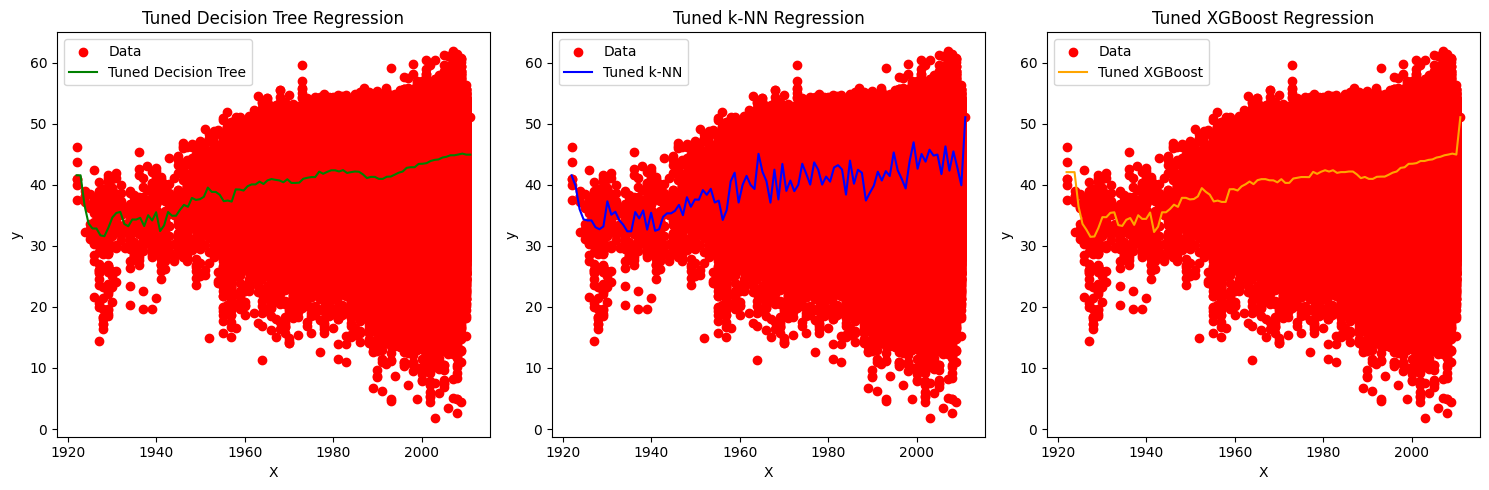

In [52]:
# Visualisasi Model Setelah Hyperparameter Tuning
# --------------------------------------------
plt.figure(figsize=(15, 5))

# Decision Tree Visualization
plt.subplot(1, 3, 1)
plt.scatter(X, y, color='red', label='Data')
plt.plot(X_plot, best_dt_model.predict(X_plot), color='green', label='Tuned Decision Tree')
plt.title('Tuned Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# k-NN Visualization
plt.subplot(1, 3, 2)
plt.scatter(X, y, color='red', label='Data')
plt.plot(X_plot, best_knn_model.predict(X_plot), color='blue', label='Tuned k-NN')
plt.title('Tuned k-NN Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# XGBoost Visualization
plt.subplot(1, 3, 3)
plt.scatter(X, y, color='red', label='Data')
plt.plot(X_plot, best_xgb_model.predict(X_plot), color='orange', label='Tuned XGBoost')
plt.title('Tuned XGBoost Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

Setelah dilakukan tuning, ketiga model menunjukkan peningkatan dalam mengikuti pola data. Decision Tree menunjukkan hasil yang lebih stabil dan tidak terlalu step-wise dibandingkan versi sebelumnya, tetapi masih kurang halus dalam menangkap variasi data. k-NN mengalami peningkatan dalam stabilitas prediksi, tetapi tetap menunjukkan fluktuasi tinggi dan cenderung overfitting pada beberapa bagian data. XGBoost tetap menjadi model terbaik setelah tuning, karena menghasilkan prediksi yang halus dan stabil, mampu menangkap pola global dan variasi dalam data tanpa mengalami overfitting.

Secara keseluruhan, model XGBoost yang dituning adalah yang paling akurat dan stabil di antara ketiga model ini, menjadikannya pilihan terbaik untuk dataset ini dalam menangkap tren data jangka panjang serta variasi yang ada.

In [53]:
# Evaluasi MSE Setelah Hyperparameter Tuning
# --------------------------------------------
mse_dt_tuned = mean_squared_error(y_test, y_pred_dt_tuned)
mse_knn_tuned = mean_squared_error(y_test, y_pred_knn_tuned)
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)

print(f"Tuned Mean Squared Error for Decision Tree: {mse_dt_tuned:.2f}")
print(f"Tuned Mean Squared Error for k-NN: {mse_knn_tuned:.2f}")
print(f"Tuned Mean Squared Error for XGBoost: {mse_xgb_tuned:.2f}")

Tuned Mean Squared Error for Decision Tree: 34.40
Tuned Mean Squared Error for k-NN: 37.60
Tuned Mean Squared Error for XGBoost: 34.40


Setelah tuning, Decision Tree dan XGBoost tetap memiliki MSE yang sama, yaitu 34.40, menunjukkan bahwa keduanya memiliki akurasi prediksi yang serupa dalam hal kesalahan kuadrat. Namun, XGBoost tetap menjadi model yang lebih disarankan karena prediksinya yang lebih halus dan stabil, seperti terlihat pada grafik sebelumnya. Model k-NN, meskipun menunjukkan peningkatan performa setelah tuning, masih memiliki MSE yang lebih tinggi (37.60), yang menandakan bahwa model ini kurang akurat dibandingkan dengan Decision Tree dan XGBoost. Secara keseluruhan, XGBoost tetap menjadi model terbaik untuk dataset ini setelah tuning, dengan MSE yang rendah dan performa prediksi yang stabil.